# `Cancer Classification using different classification ALGO`

In [400]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [401]:
data = pd.read_csv('cancer data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [402]:
data.shape

(569, 33)

In [403]:
data.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [404]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [405]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [406]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## `Univariate Analysis`

In [407]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [408]:
target = data['diagnosis']
cont_columns = data.select_dtypes('float64').columns

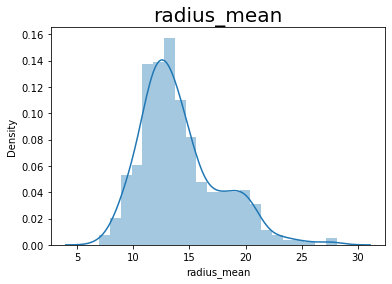

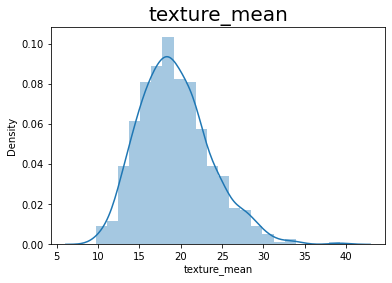

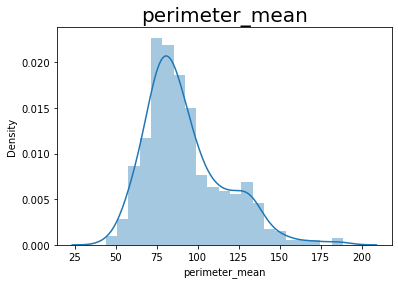

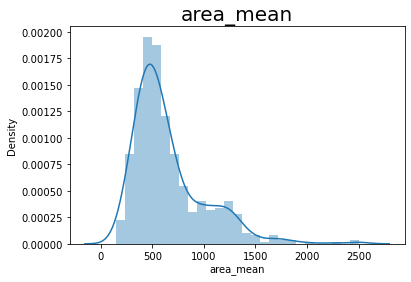

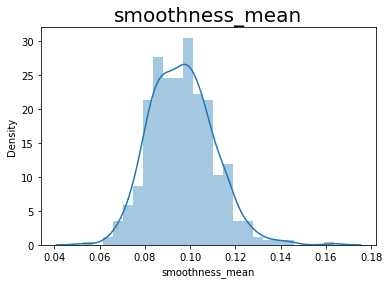

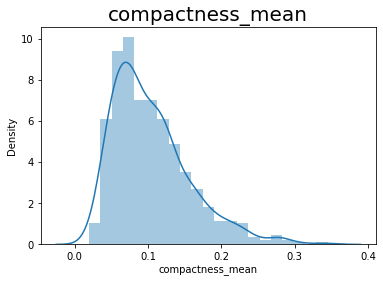

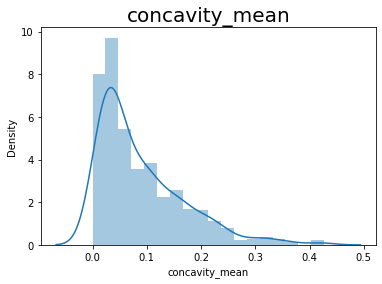

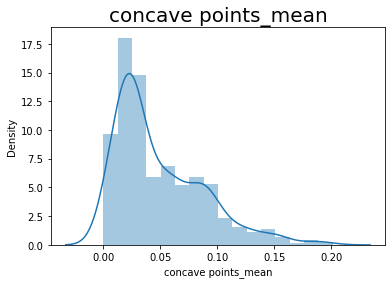

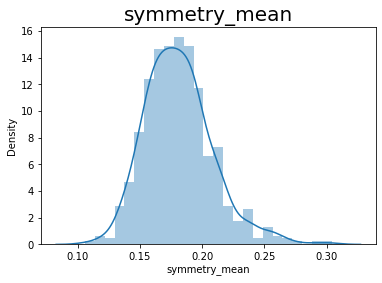

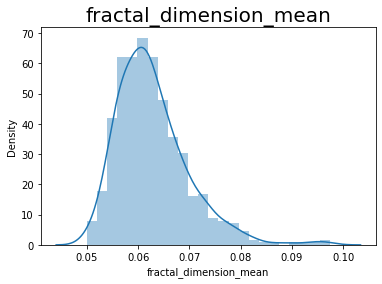

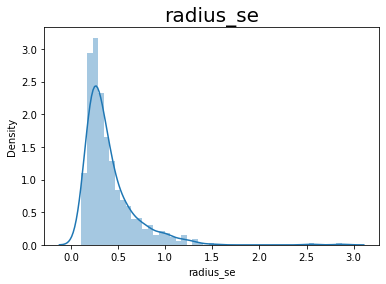

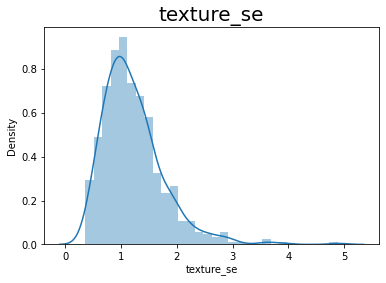

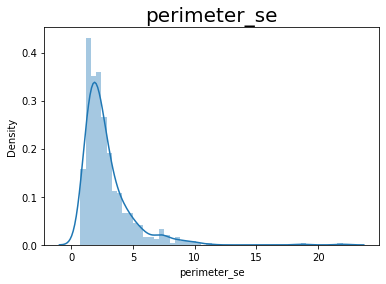

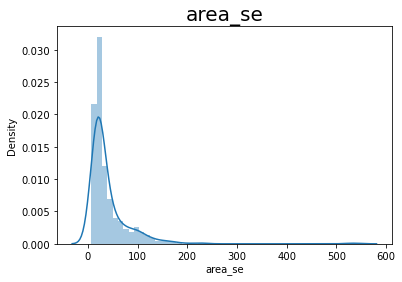

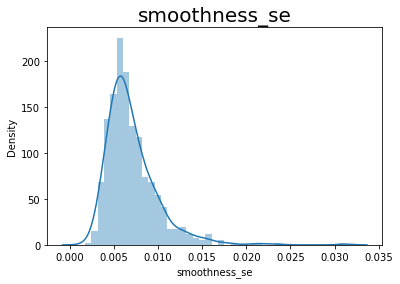

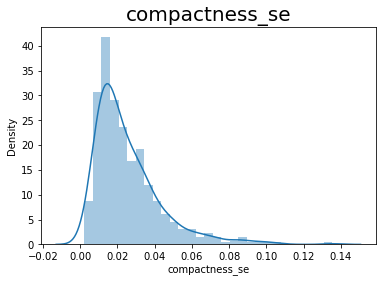

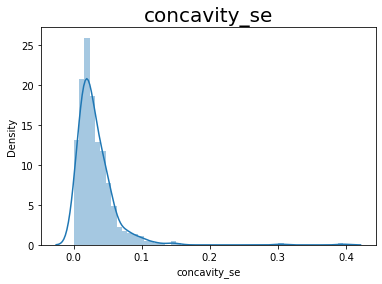

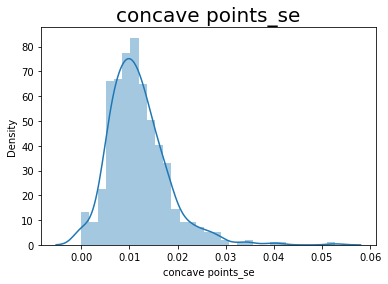

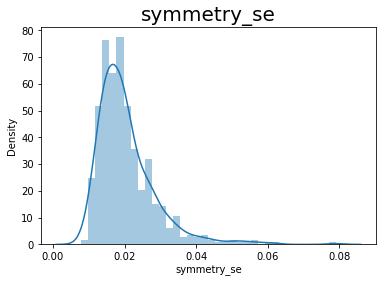

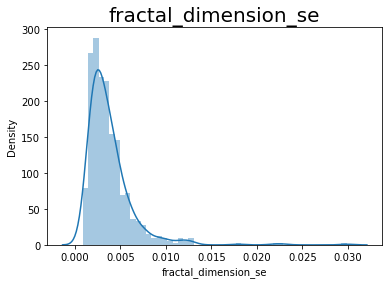

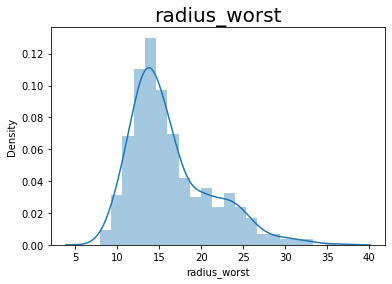

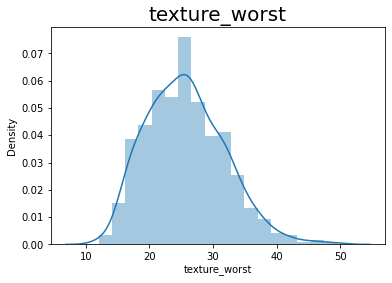

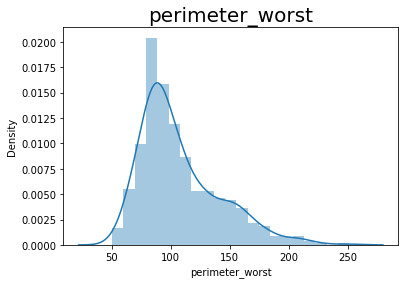

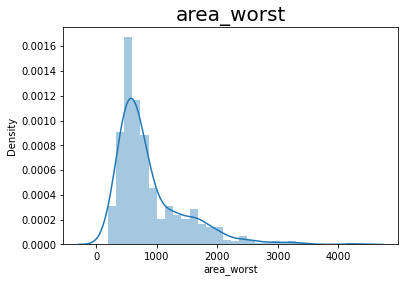

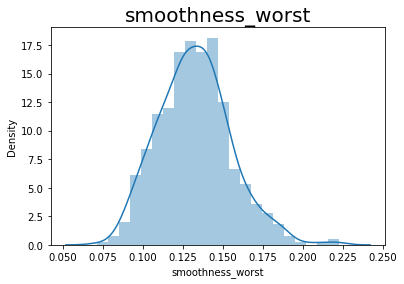

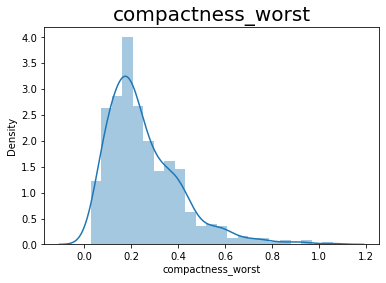

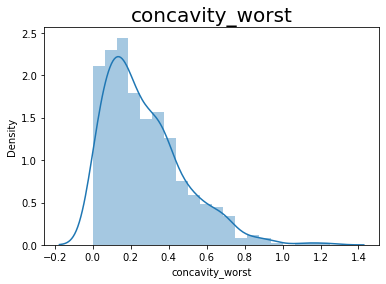

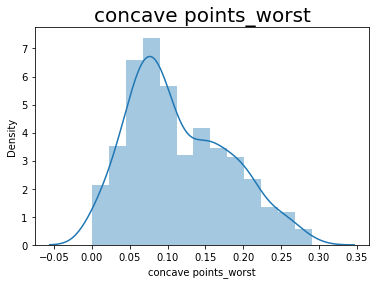

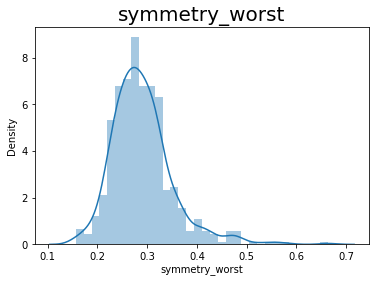

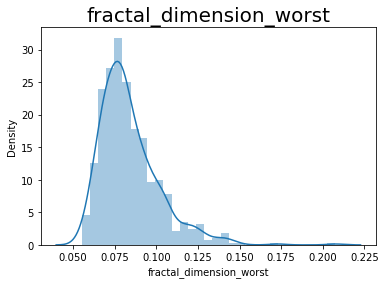

In [409]:
for i in cont_columns:
    sns.distplot(data[i])
    plt.title(i,fontsize=20)
    plt.show()

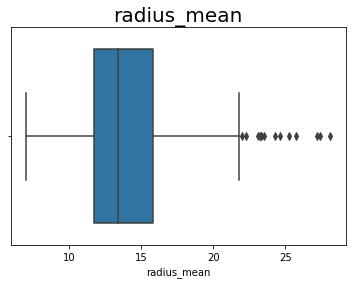

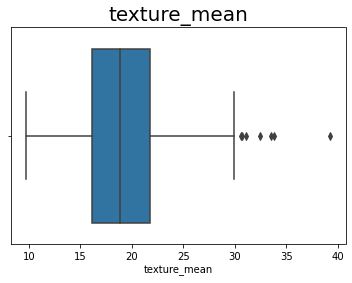

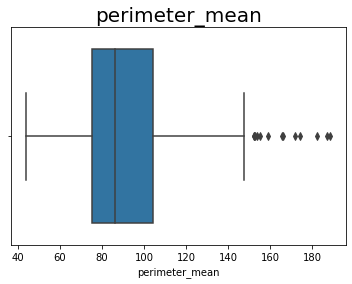

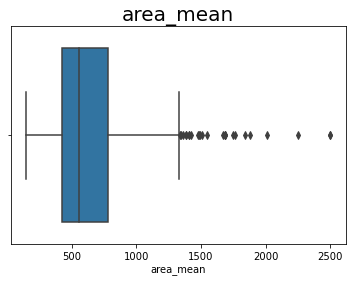

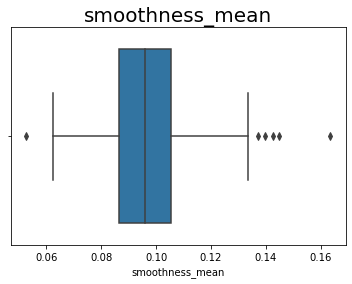

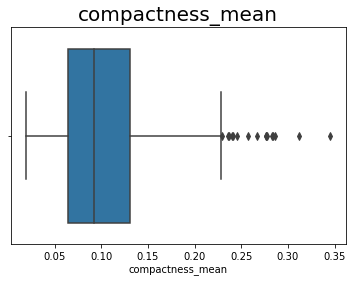

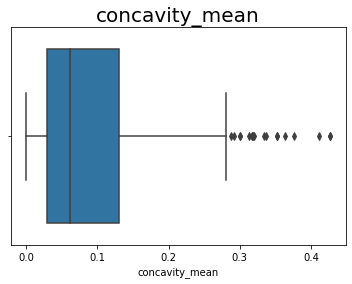

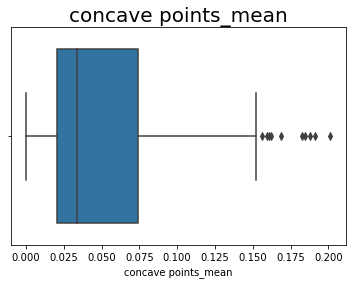

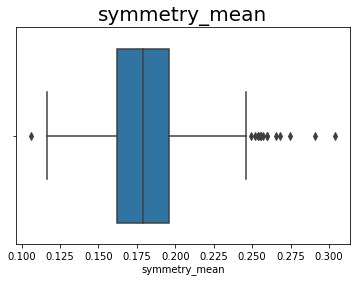

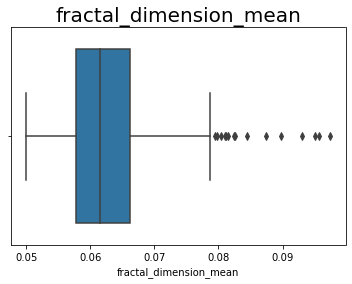

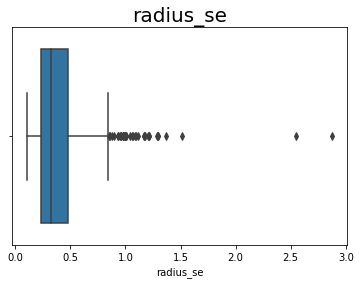

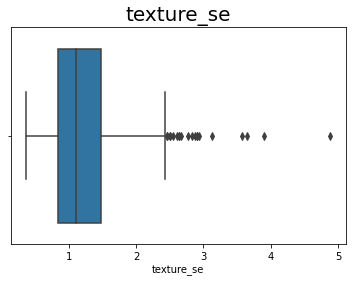

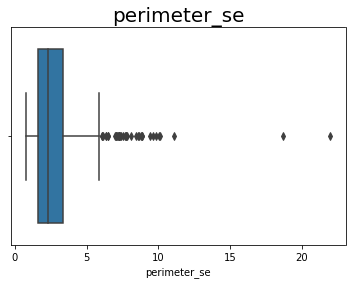

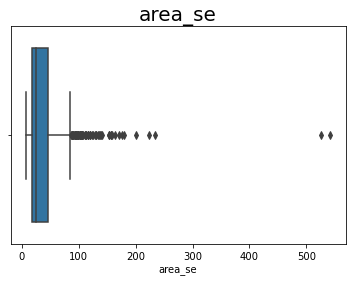

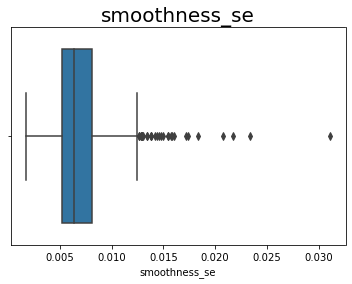

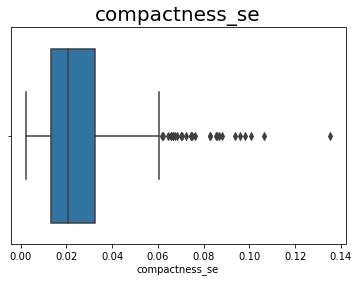

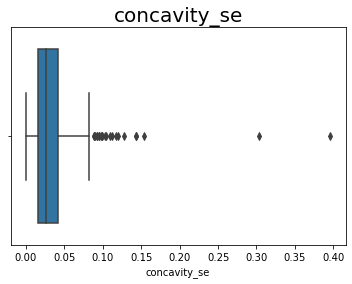

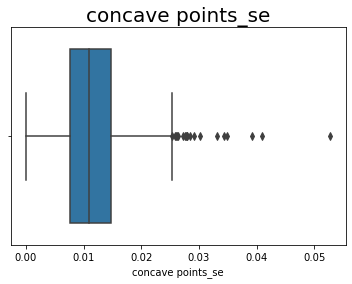

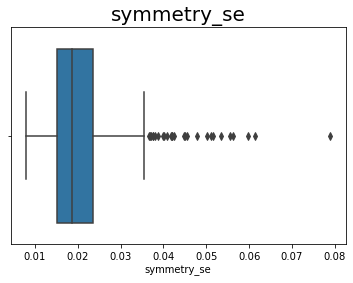

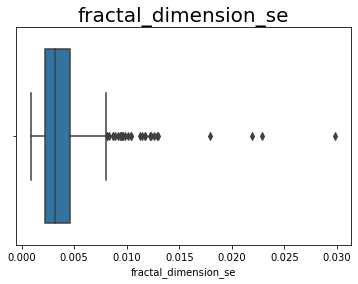

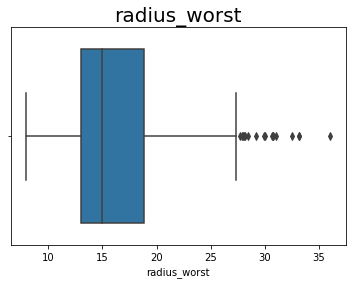

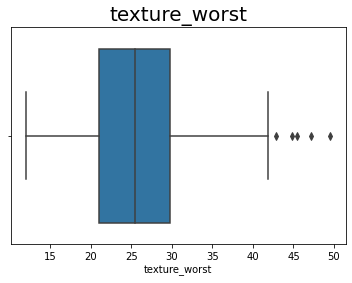

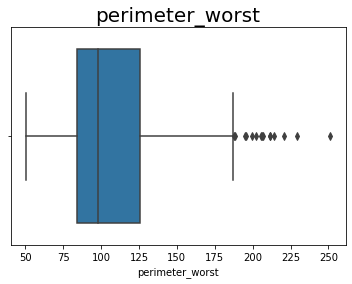

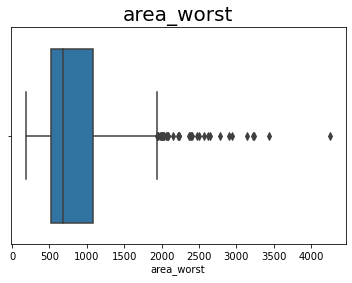

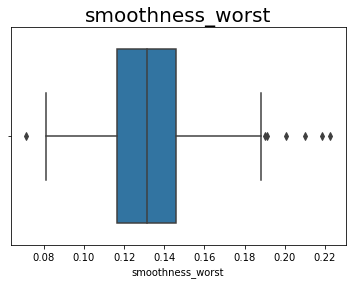

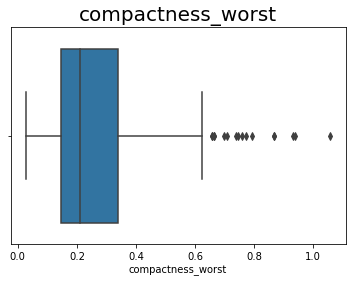

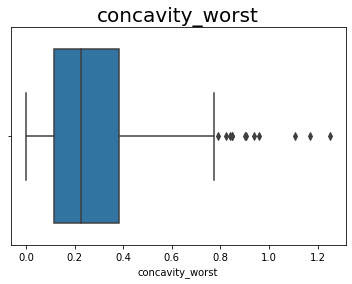

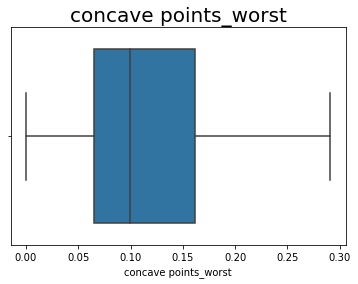

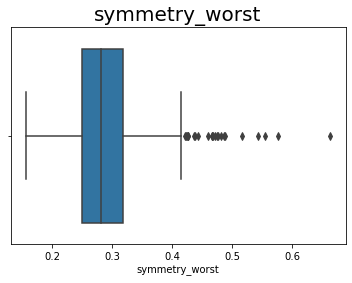

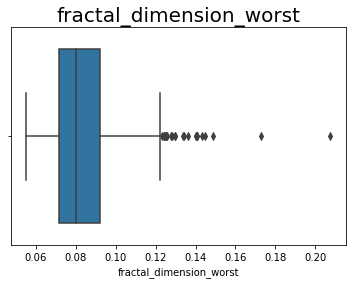

In [410]:
for i in cont_columns:
    sns.boxplot(data[i])
    plt.title(i,fontsize=20)
    plt.show()

## `Multivariate Analysis` 
### 1. `T-Test` Cont vs Target

In [411]:
from scipy.stats import ttest_ind

def t_test(col,grp1,grp2):
    plt.figure(figsize=(24,8))
    sns.distplot(grp1)
    sns.distplot(grp2)
    t_test_results = ttest_ind(grp1,grp2)
    print(f'{col} ==> t_test result ==> {t_test_results}')

radius_mean ==> t_test result ==> Ttest_indResult(statistic=25.435821610057054, pvalue=8.465940572262422e-96)
texture_mean ==> t_test result ==> Ttest_indResult(statistic=10.86720108146434, pvalue=4.0586360478980736e-25)
perimeter_mean ==> t_test result ==> Ttest_indResult(statistic=26.405212979192665, pvalue=8.43625103617473e-101)
area_mean ==> t_test result ==> Ttest_indResult(statistic=23.938687235690992, pvalue=4.734564310307344e-88)
smoothness_mean ==> t_test result ==> Ttest_indResult(statistic=9.146098808149038, pvalue=1.0518503592032013e-18)
compactness_mean ==> t_test result ==> Ttest_indResult(statistic=17.69839197688993, pvalue=3.9382631058873895e-56)
concavity_mean ==> t_test result ==> Ttest_indResult(statistic=23.103963430622642, pvalue=9.966555755072963e-84)
concave points_mean ==> t_test result ==> Ttest_indResult(statistic=29.354318592113618, pvalue=7.101150161057422e-116)
symmetry_mean ==> t_test result ==> Ttest_indResult(statistic=8.338311789592808, pvalue=5.7333840

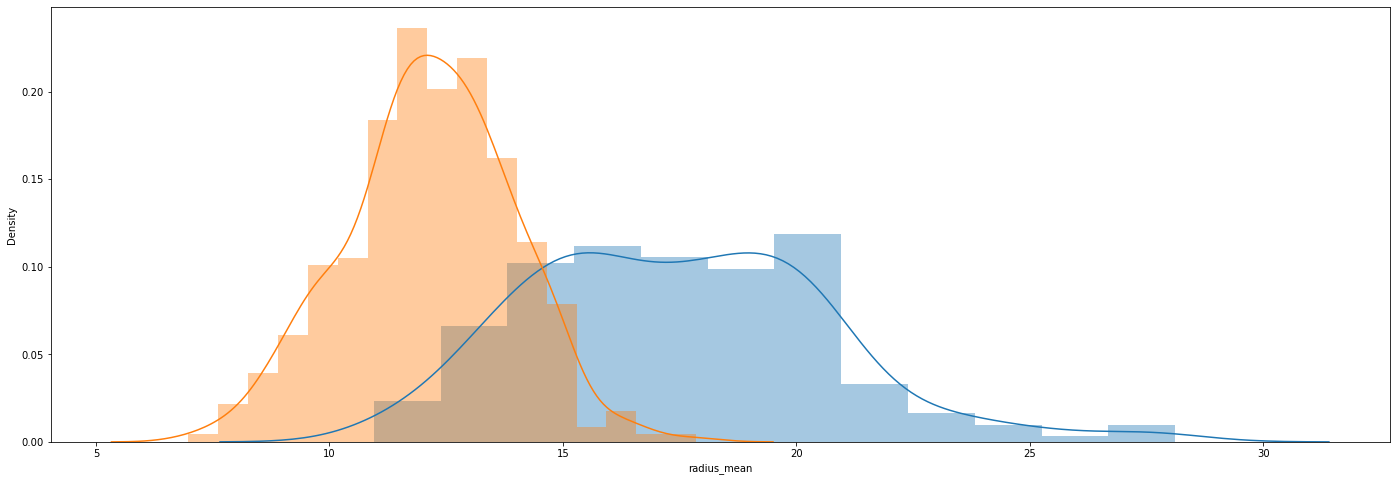

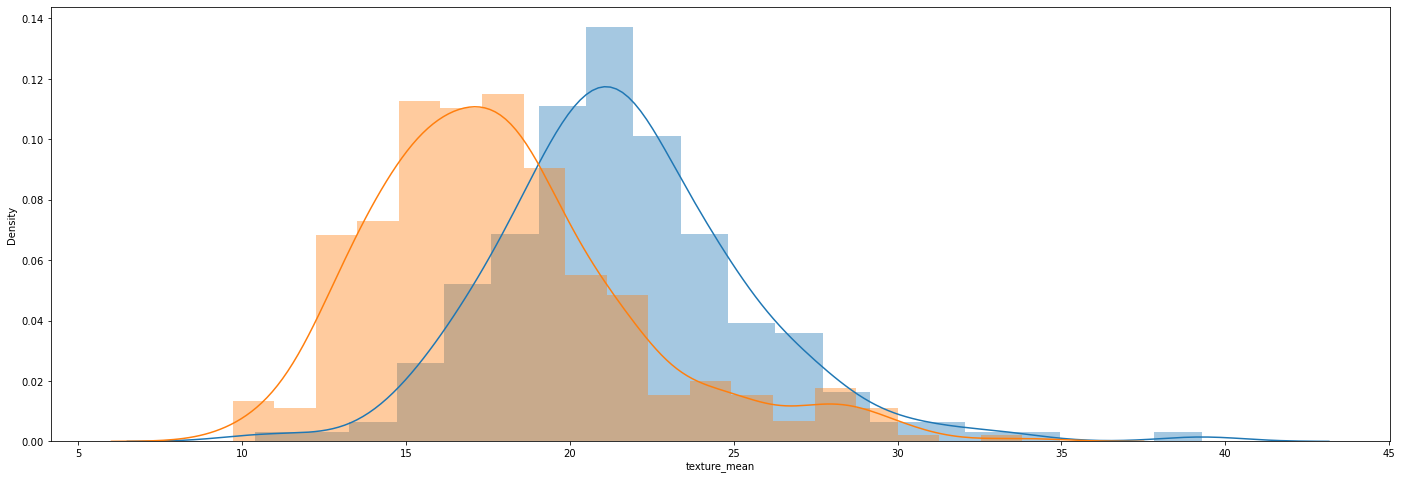

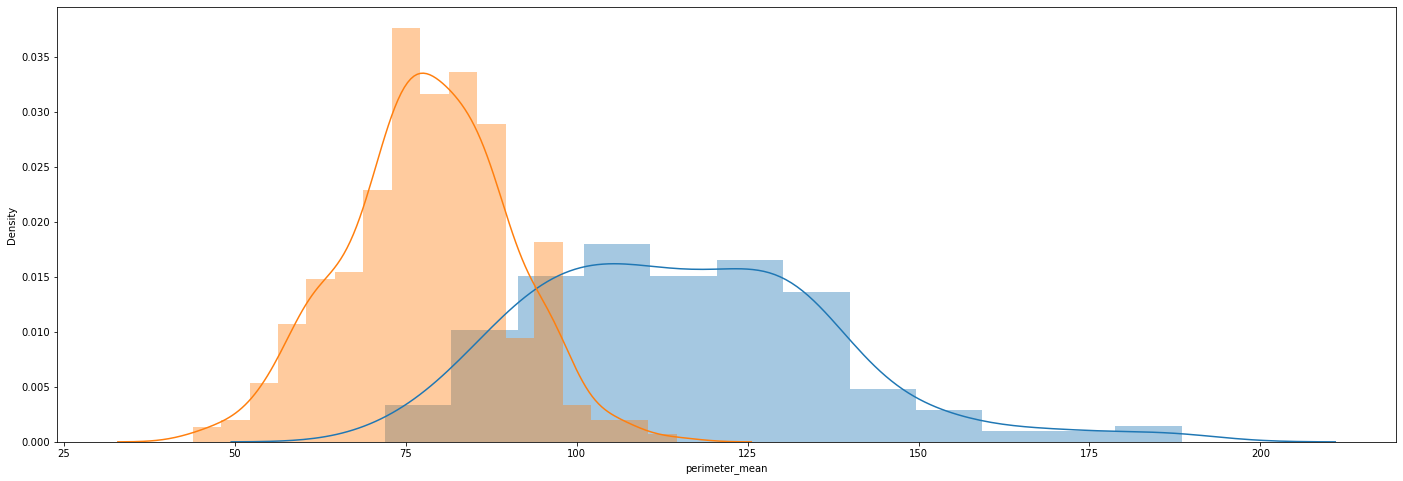

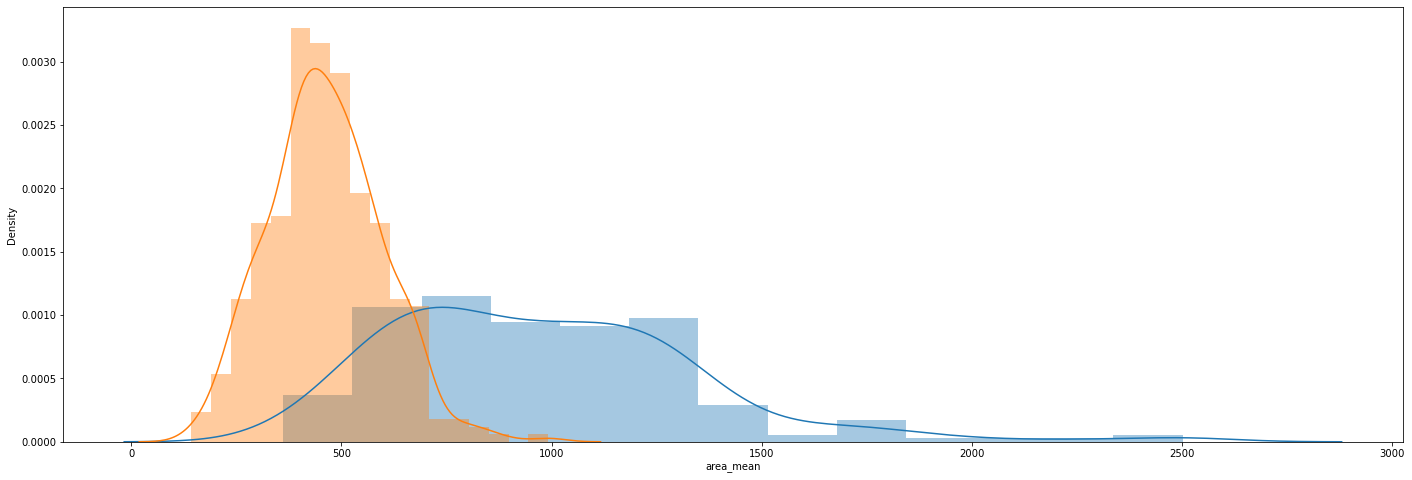

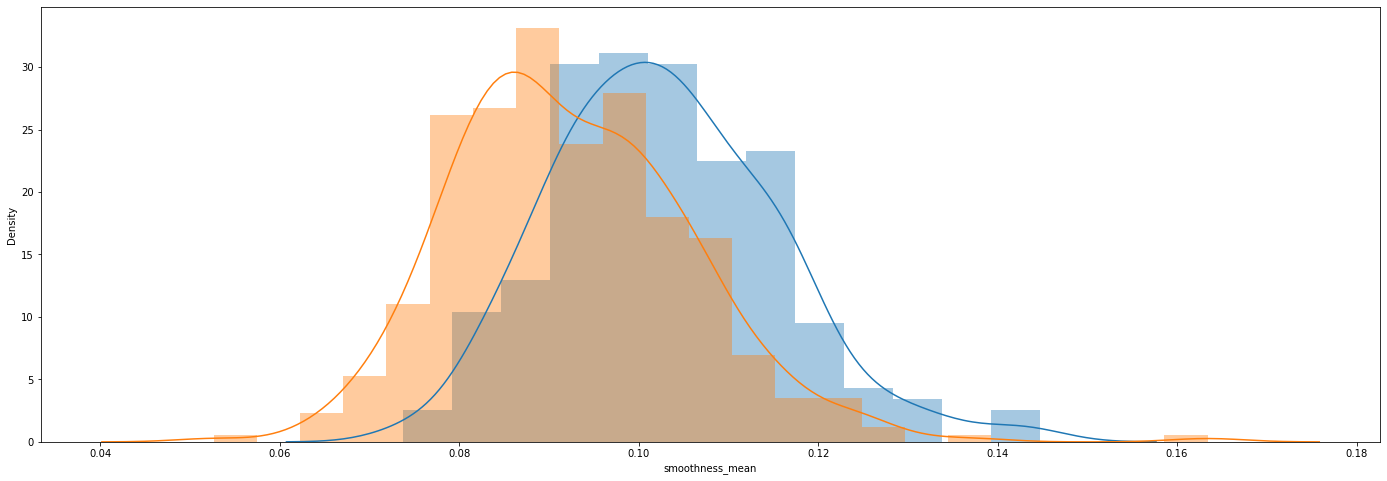

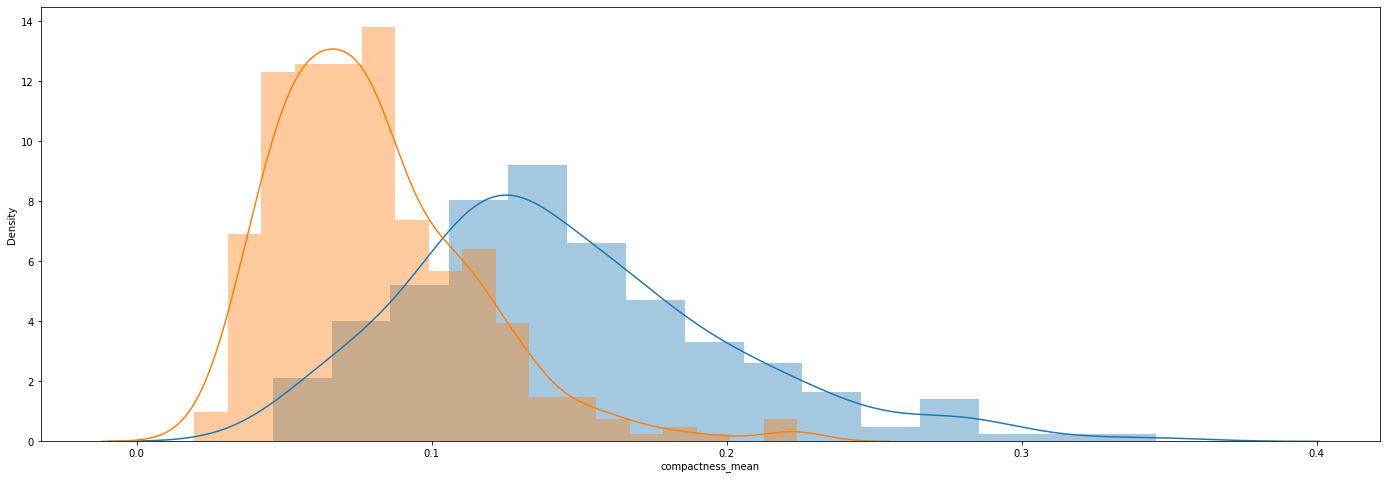

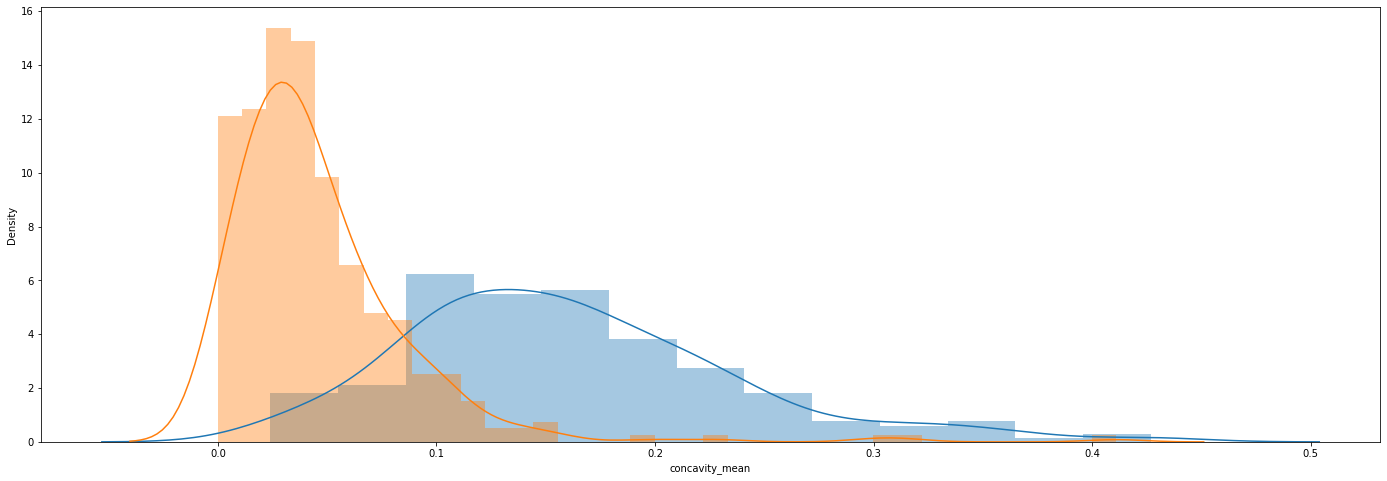

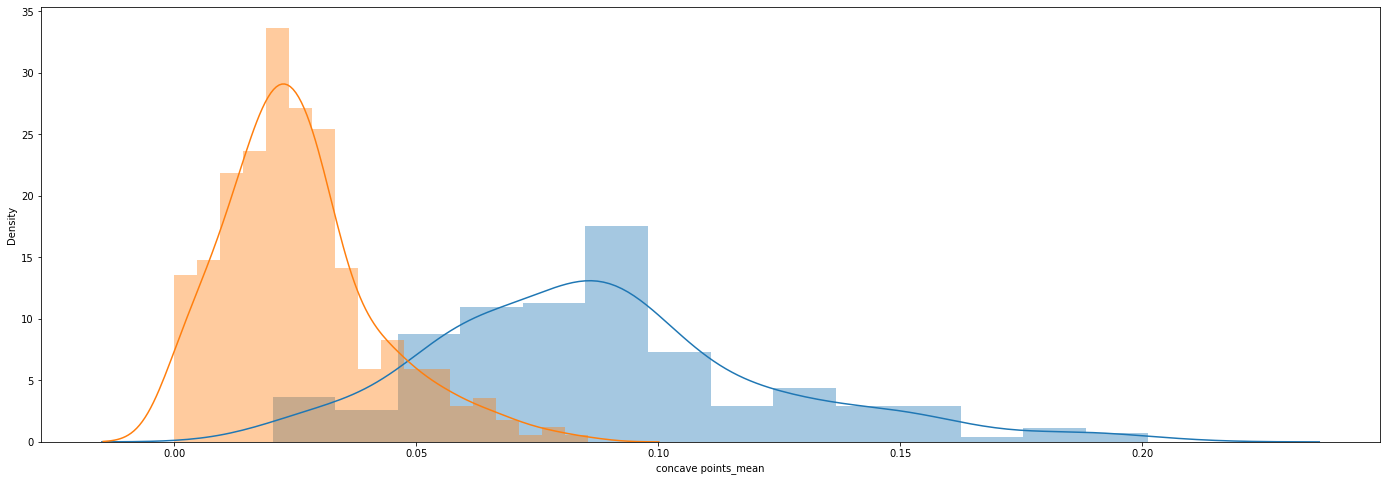

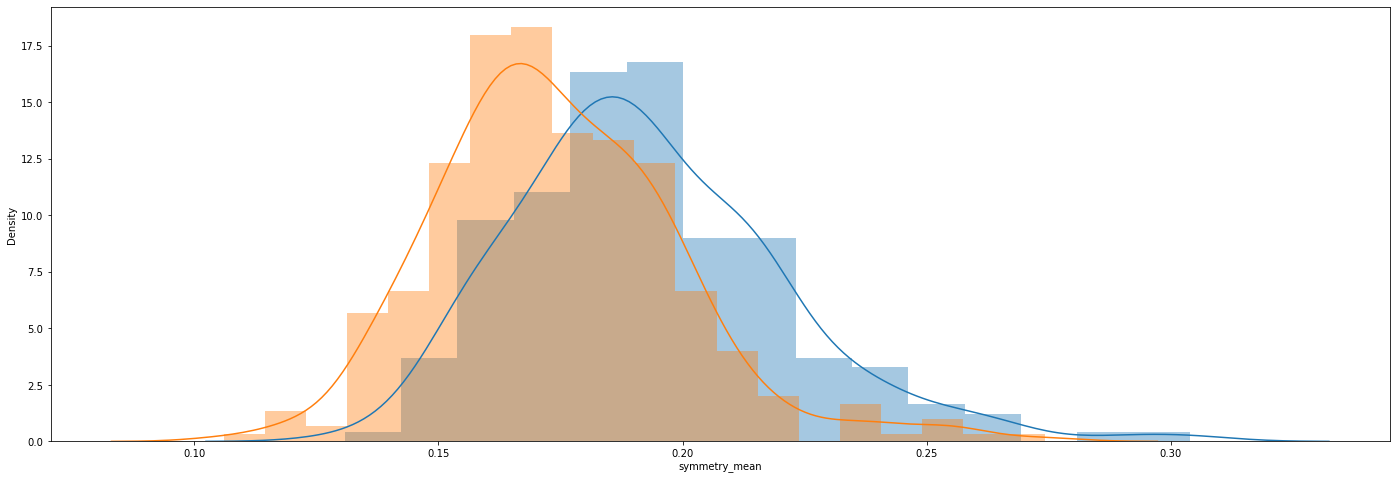

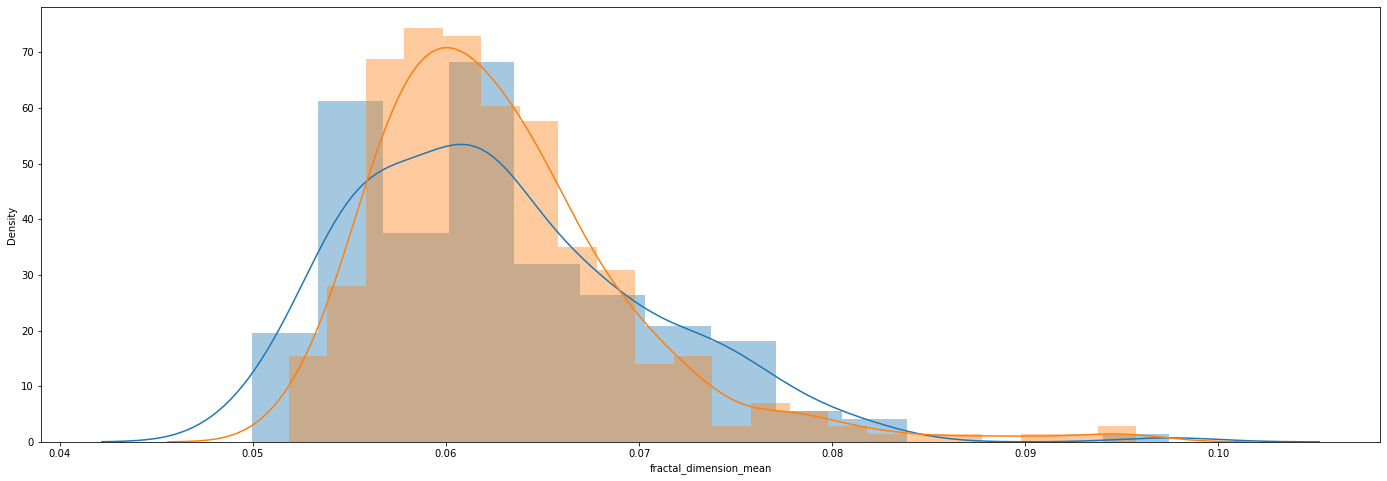

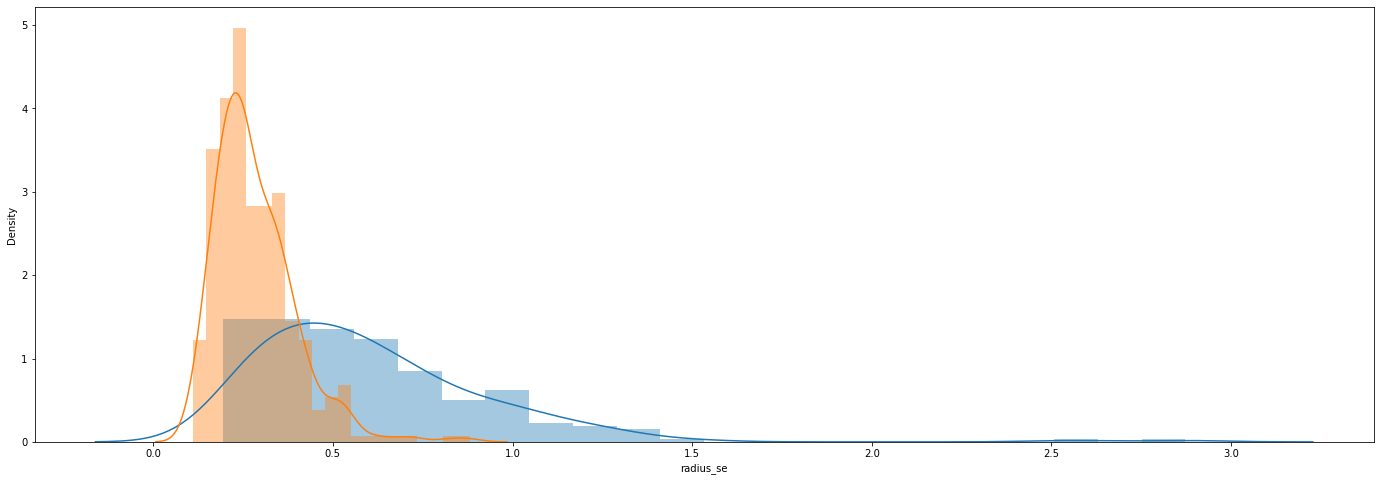

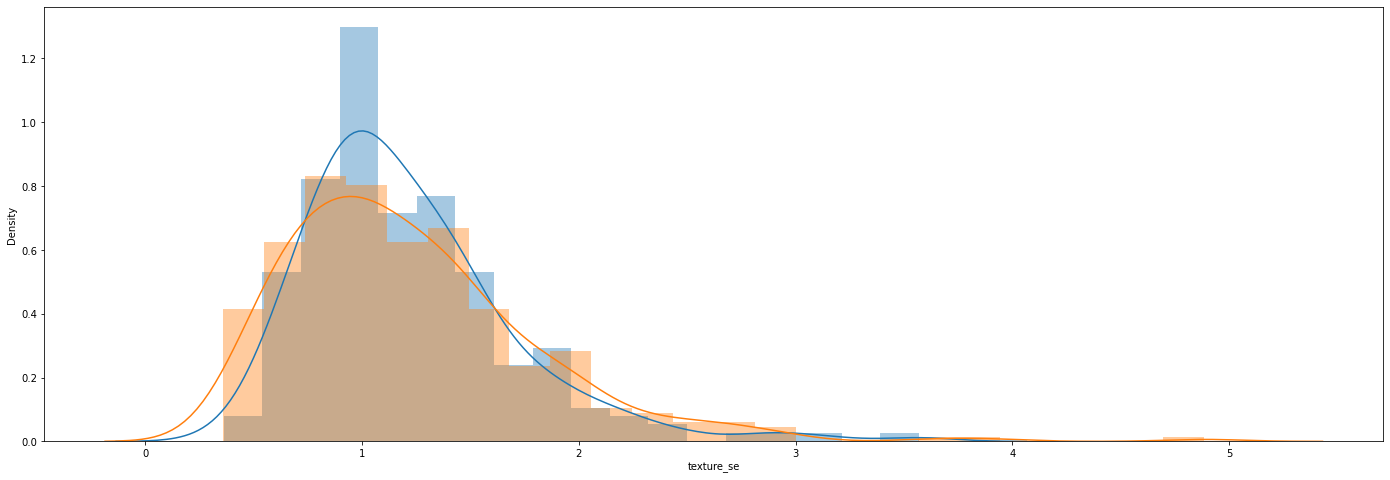

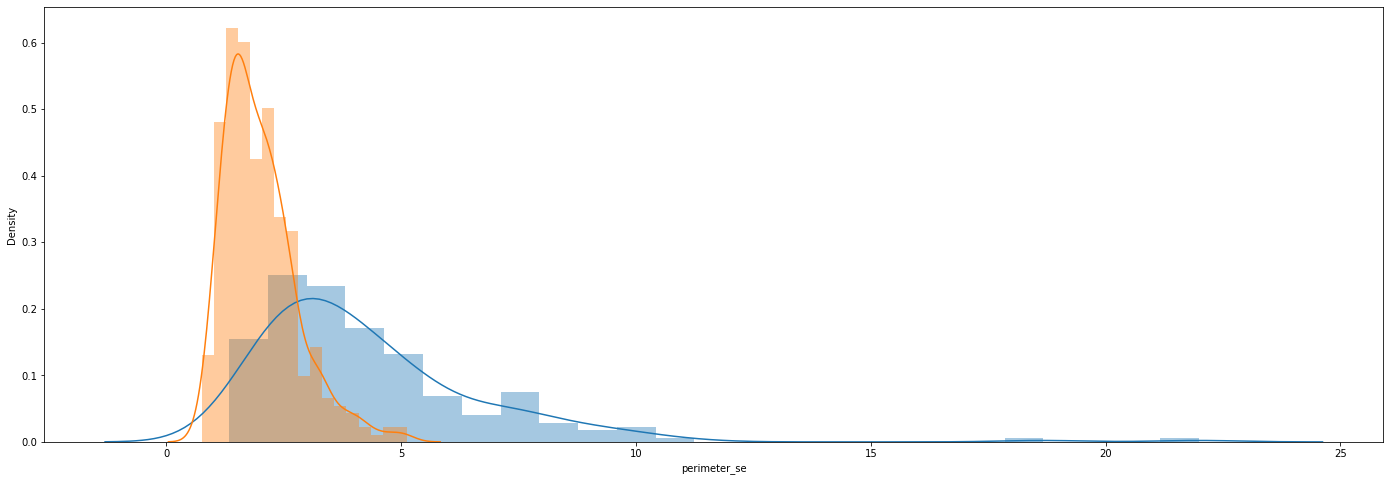

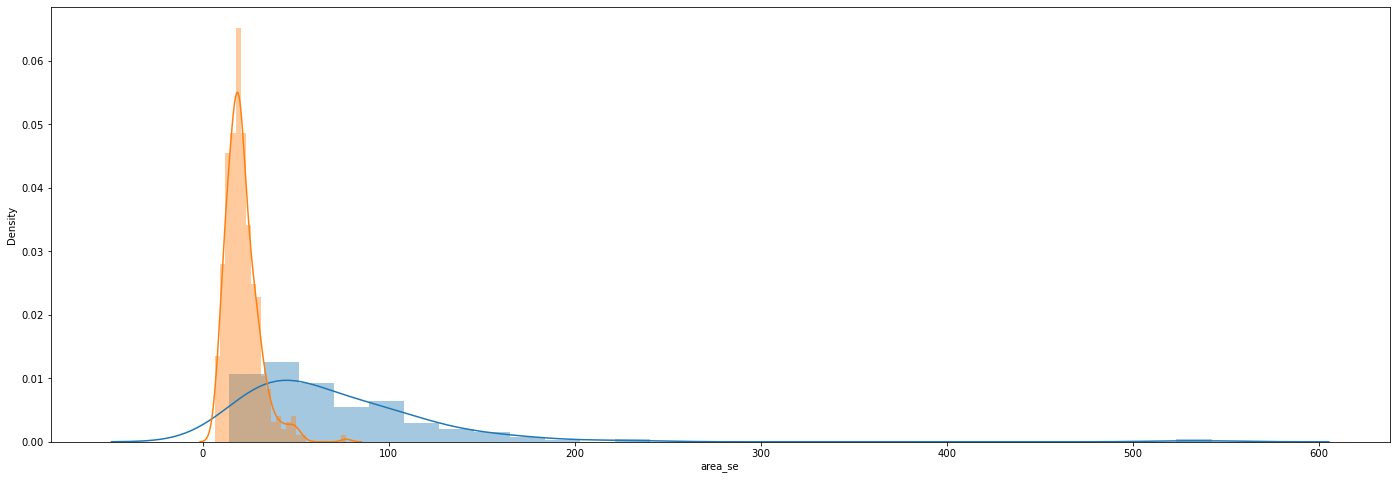

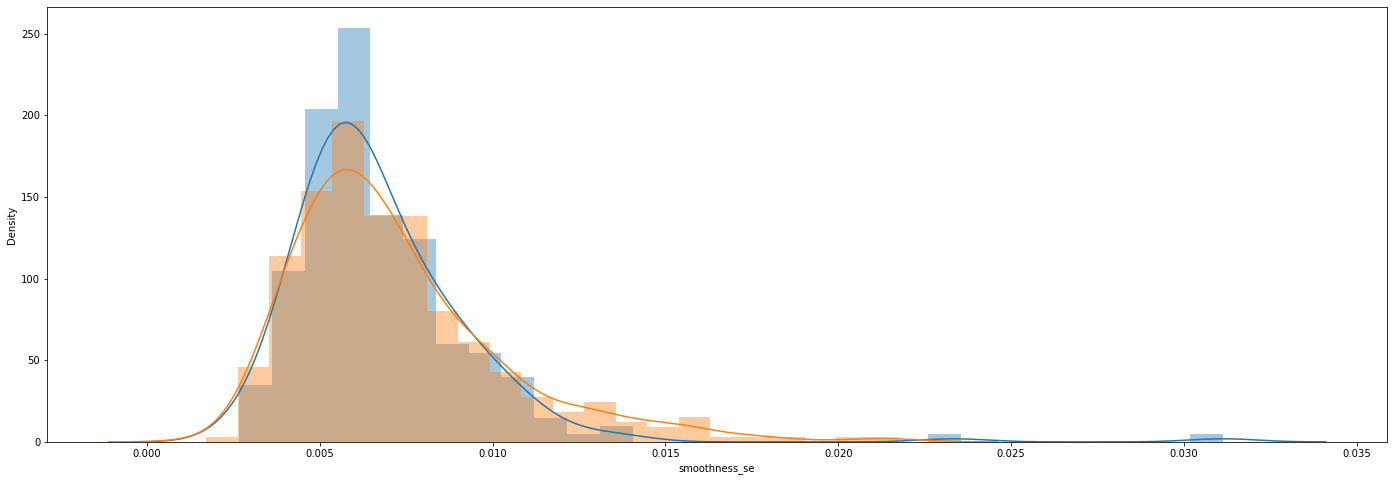

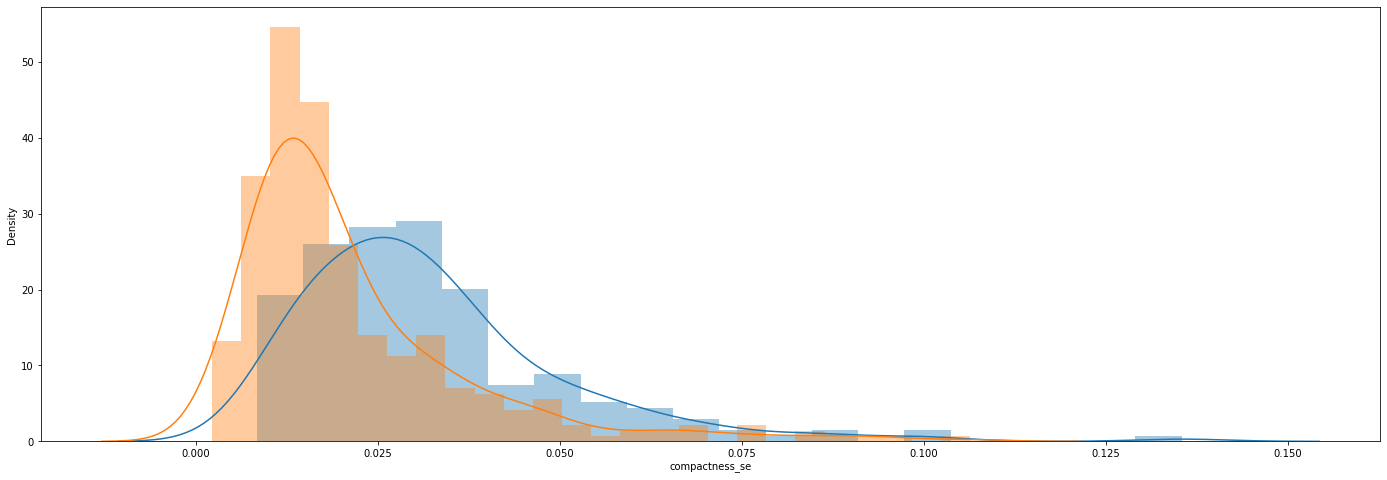

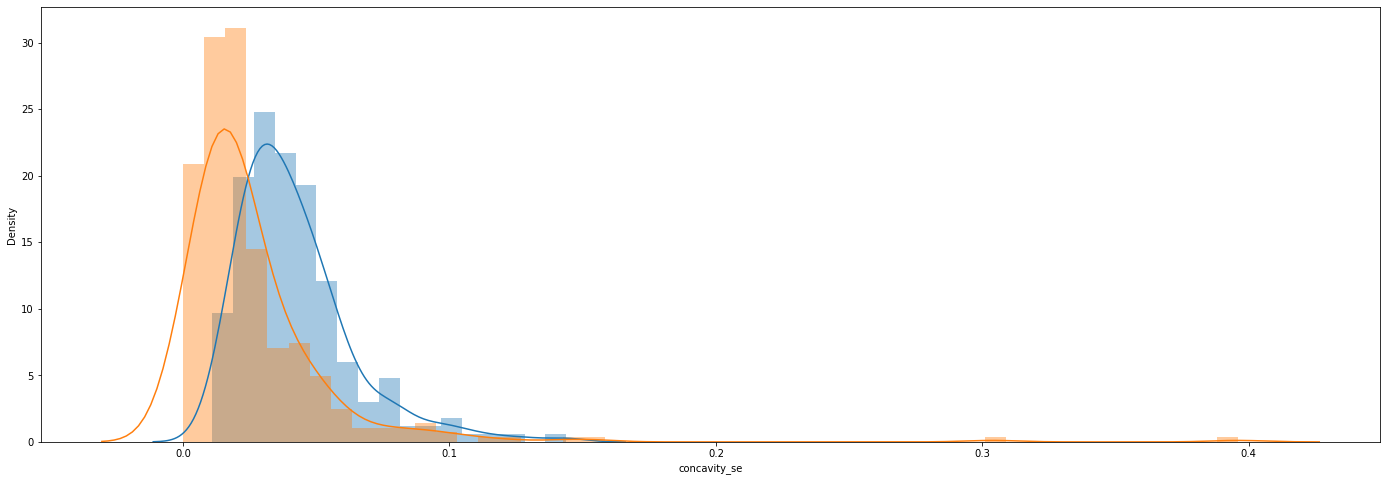

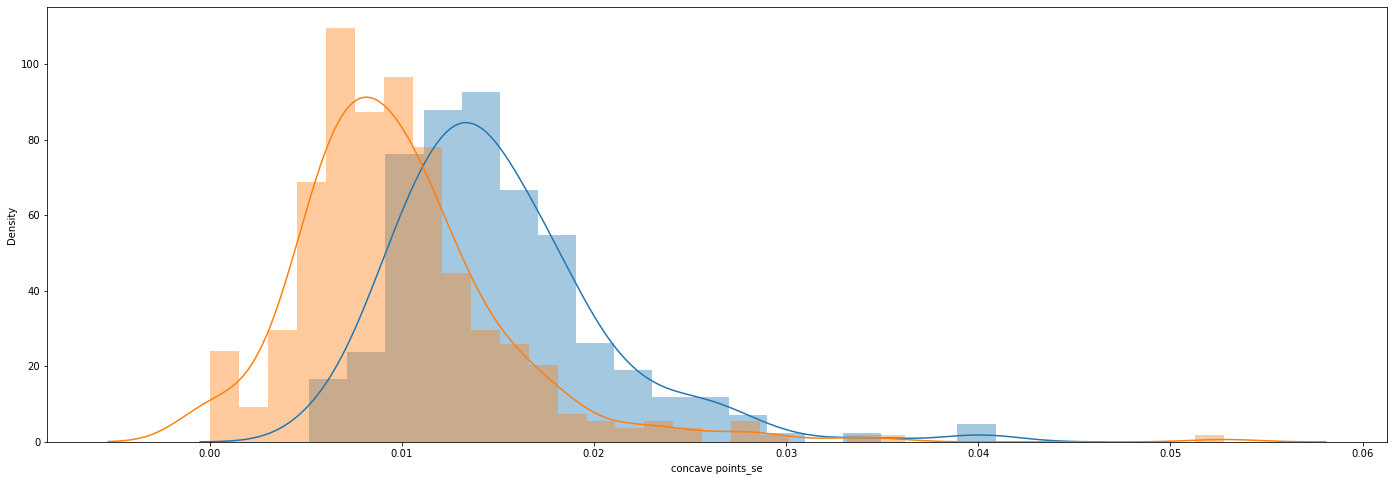

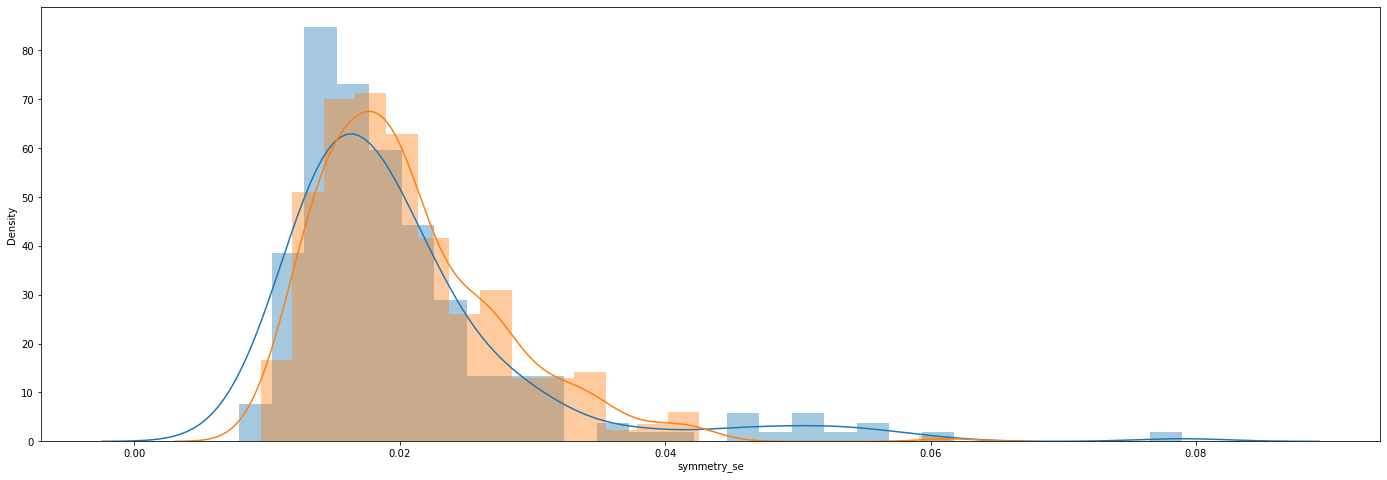

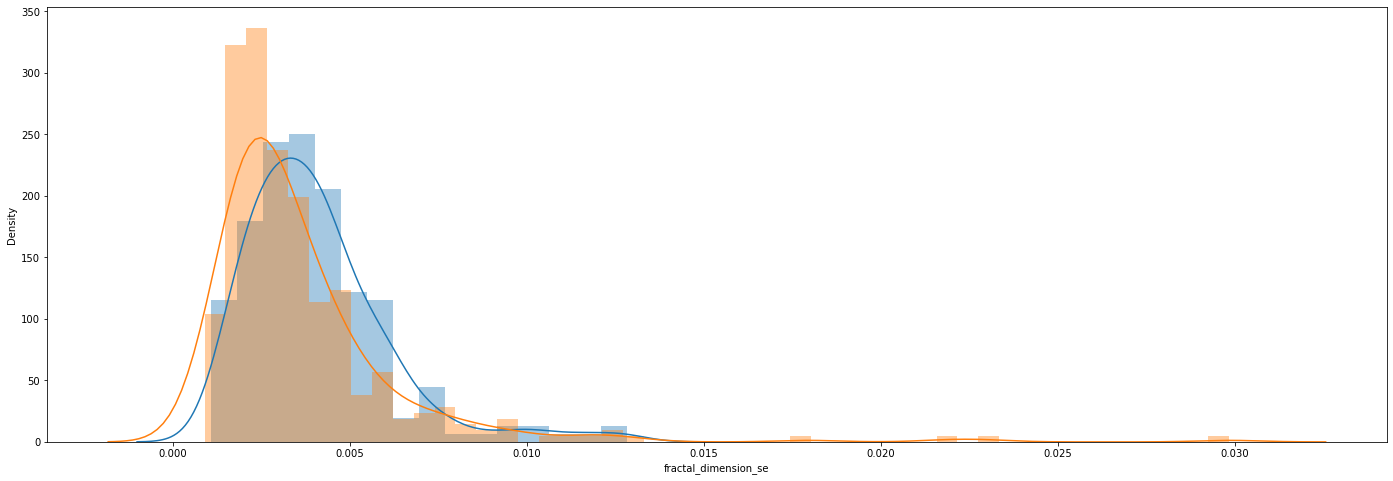

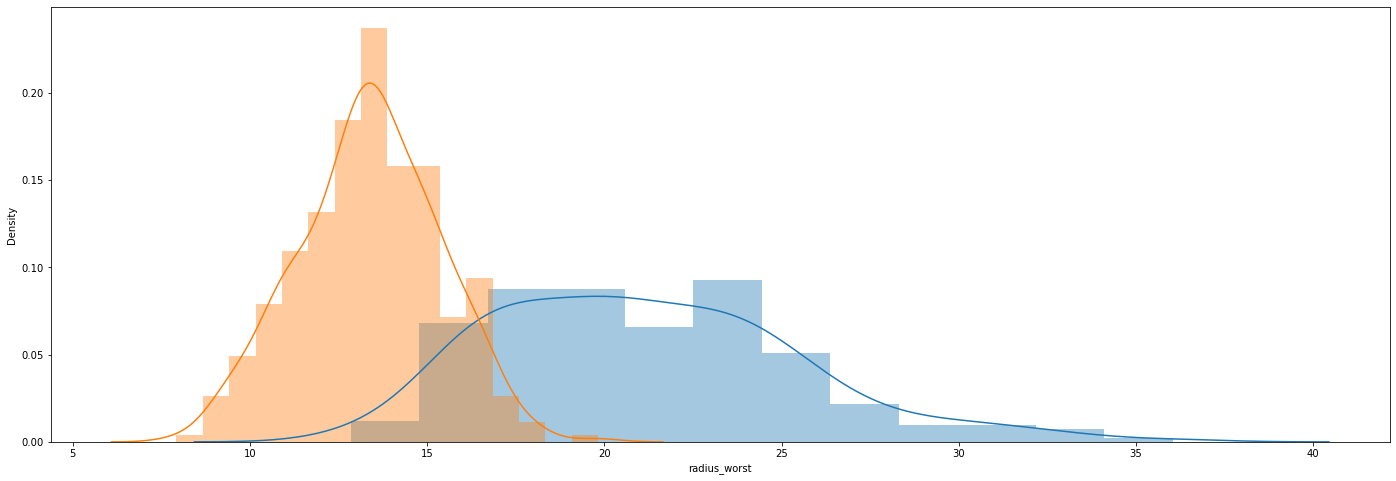

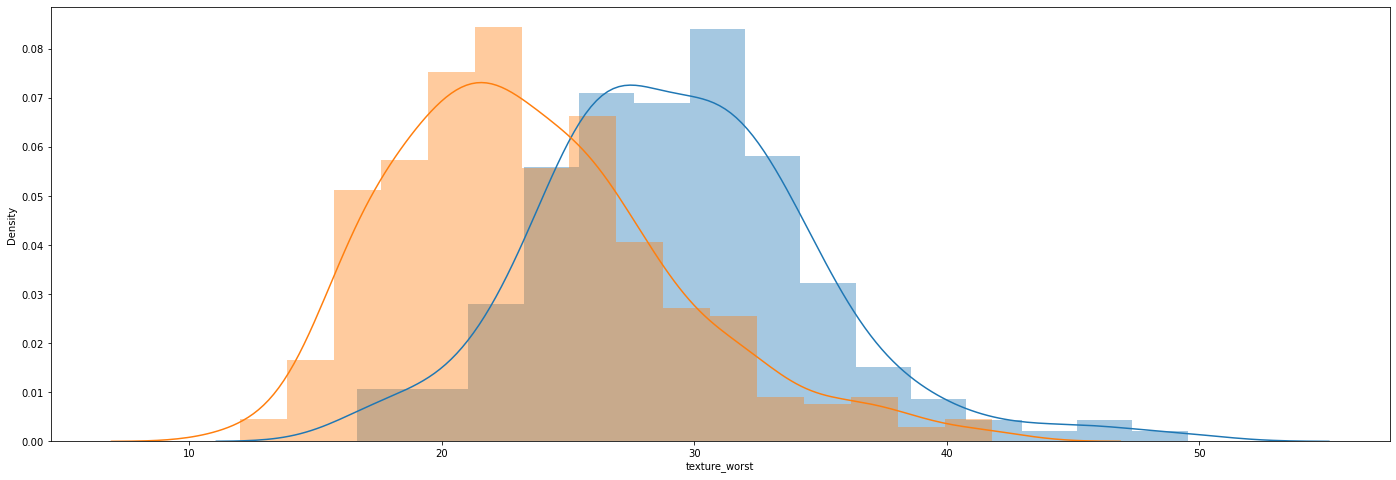

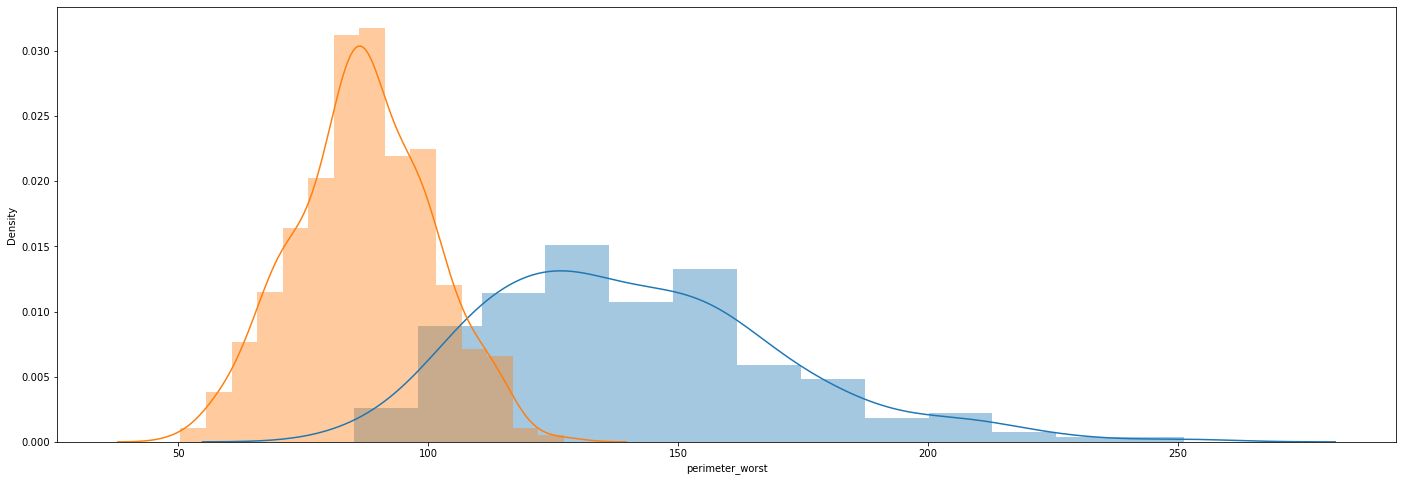

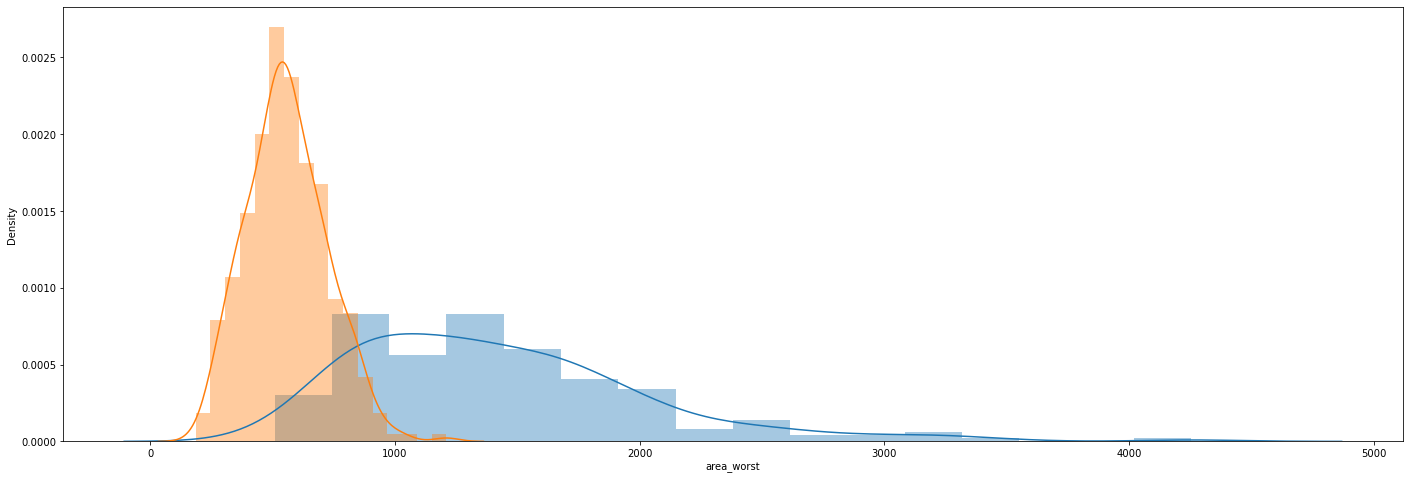

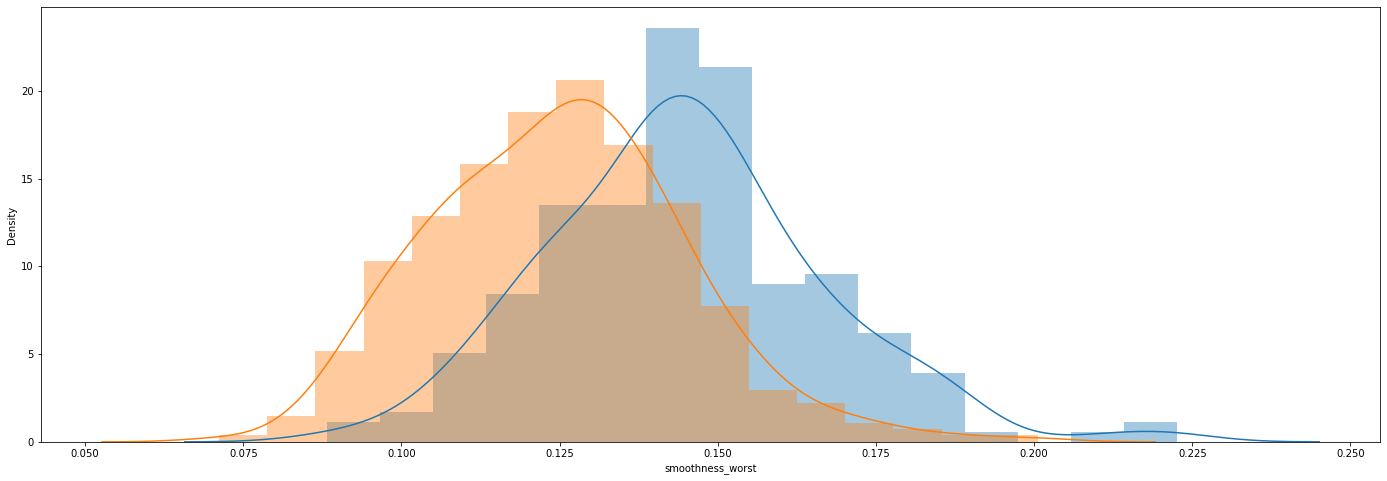

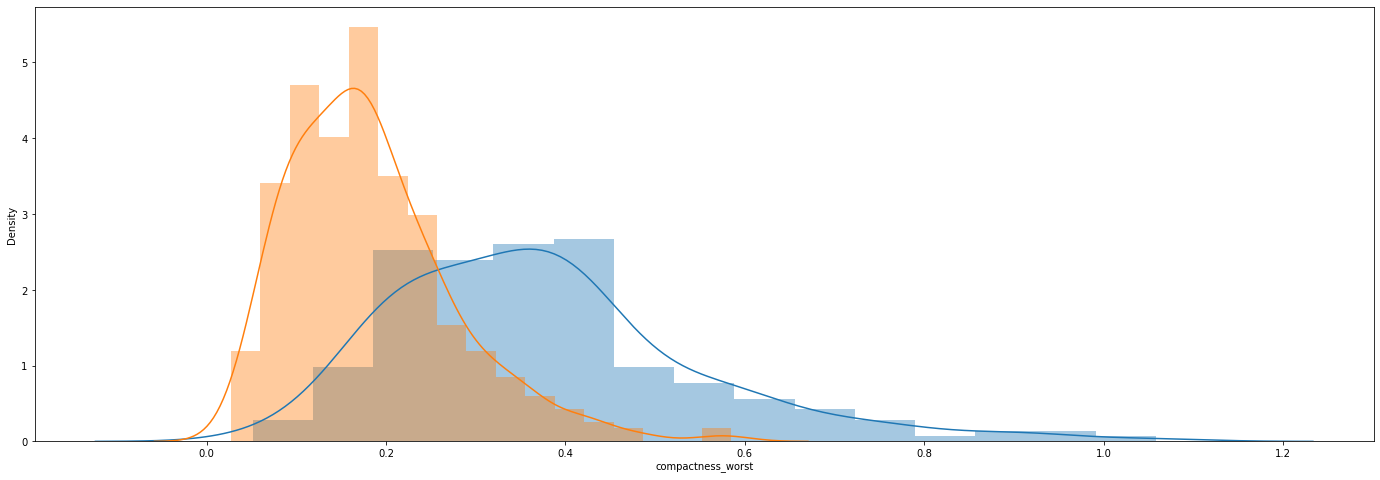

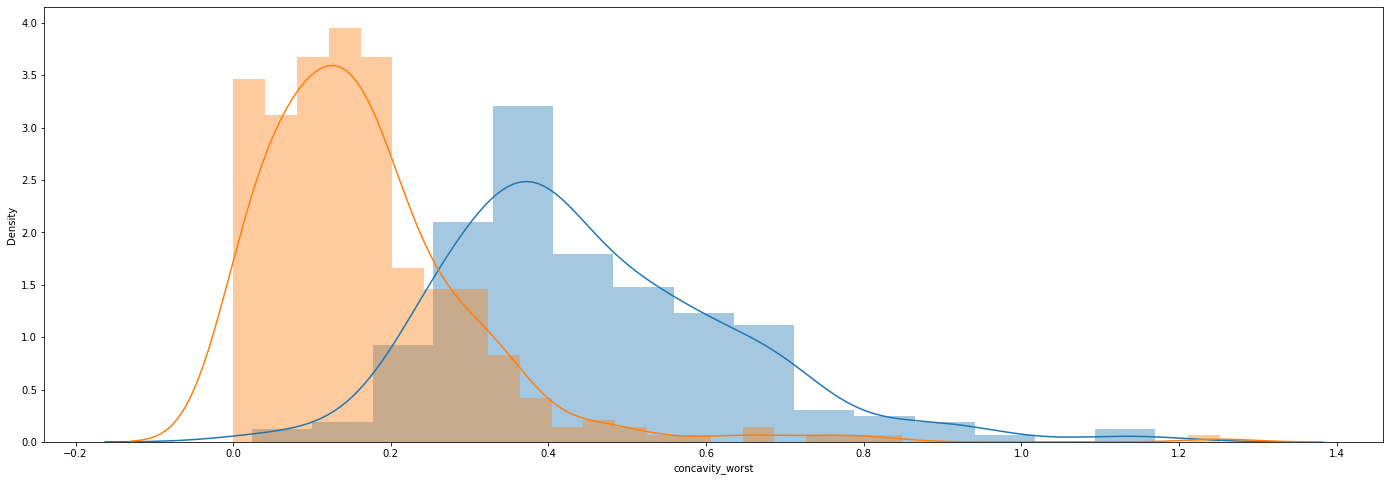

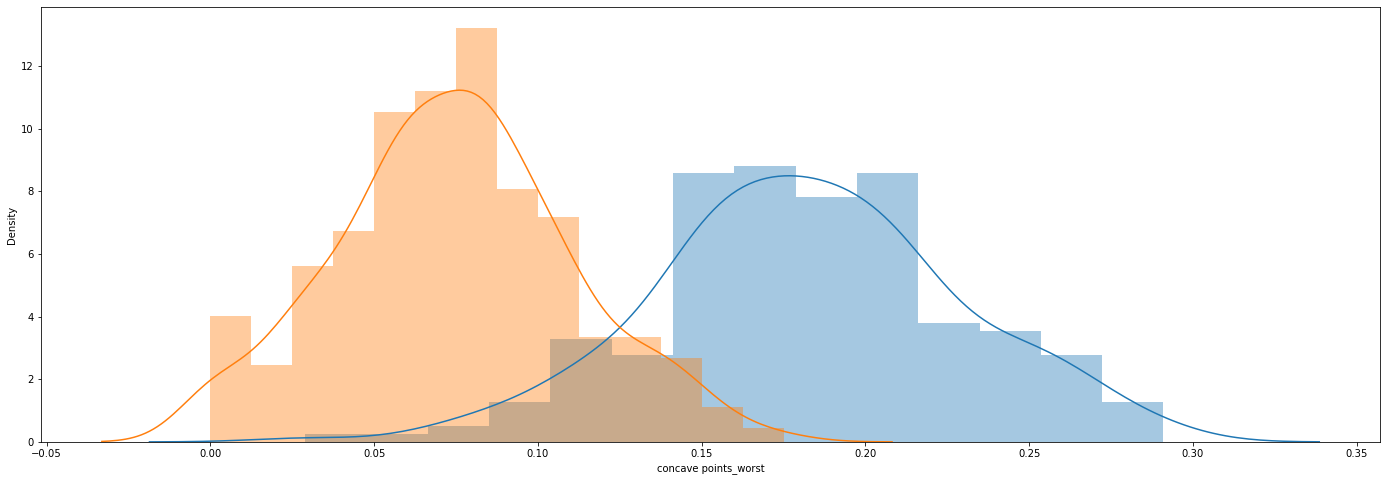

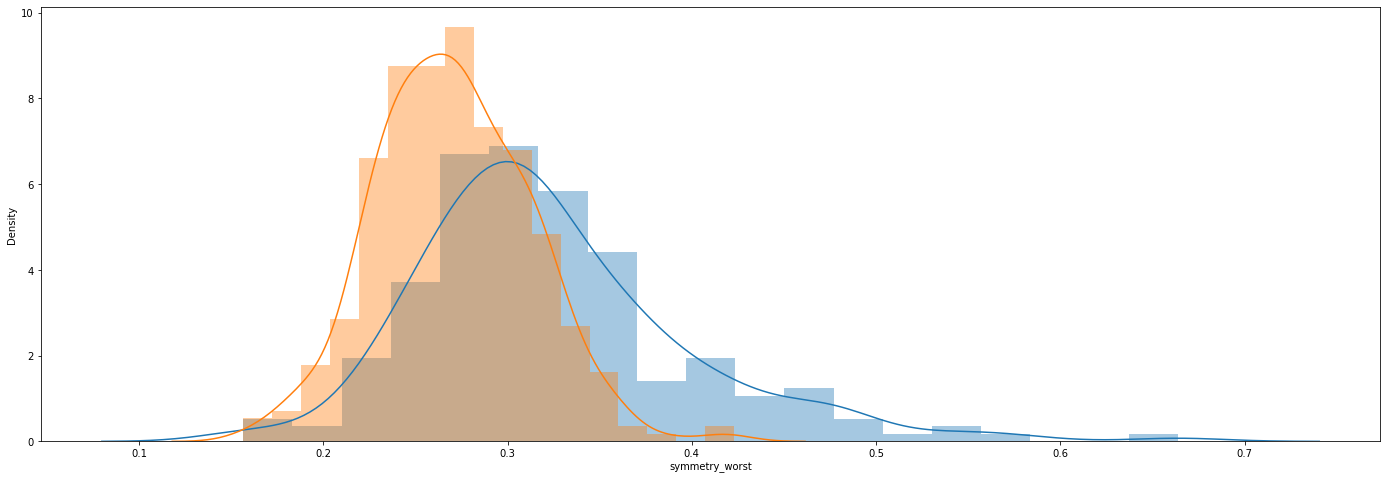

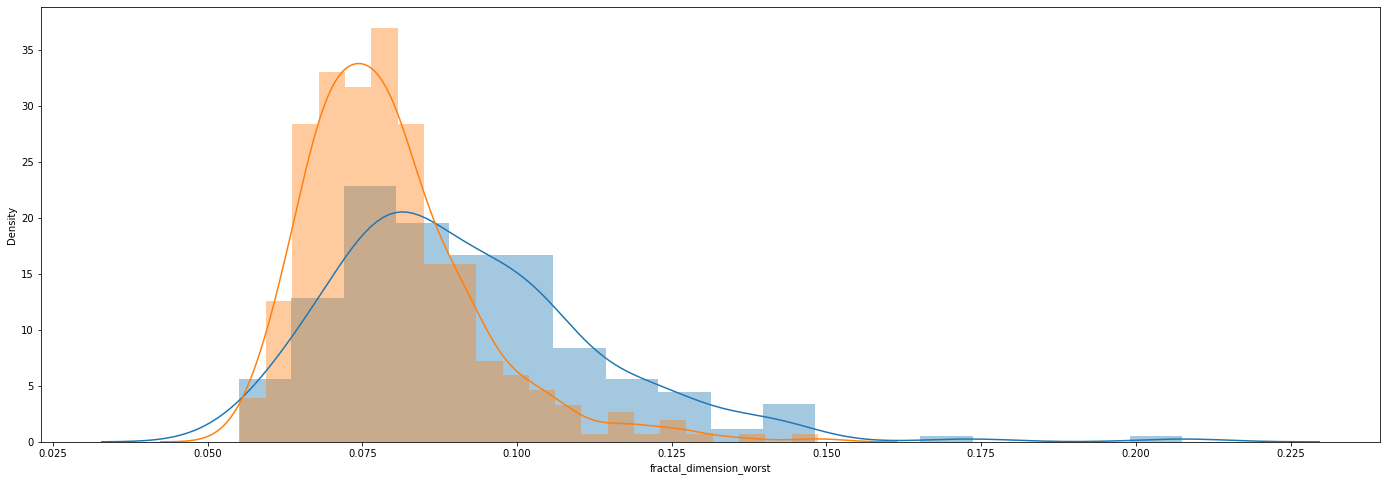

In [412]:
for col in cont_columns:
    grp1 = data.loc[target=='M',col]
    grp2 = data.loc[target=='B',col]
    t_test(col,grp1,grp2)

### `p-value > 0.05, ignore that variable`
## `Correlation Chart`

<AxesSubplot:>

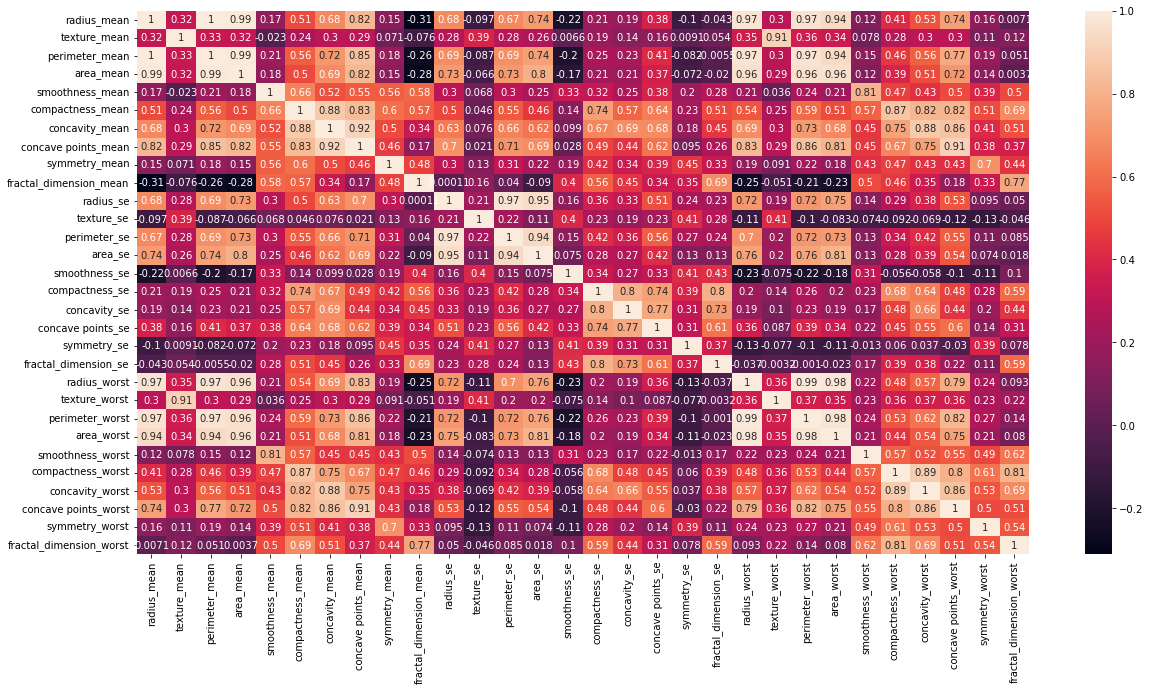

In [413]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

### `Logistic Regressionn can be implemented by`:
1. MLE
2. Gradient Descent
3. SGD
4. BFGS...etc multiple methods

### `How do you convert line to a S-shaped curved(Important Interview Question)`

### `Odd's ratio`:
- probability of success/probability of failure = p/(1-p)
- winning ratio / odd's ratio

### `log transformation of odd's ratio graph gives us the s-shaped curve`

### `We use MLE, GD or SGD are used to find the coefficient of Logistic Regression`

## `Gradient Descent Logistic Regression`

## `Based on T test on predictor and response we will select variables`

In [414]:
data = data[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean',
       'radius_se', 'perimeter_se', 'area_se',
       'compactness_se', 'concavity_se', 'concave points_se',
       'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

<AxesSubplot:>

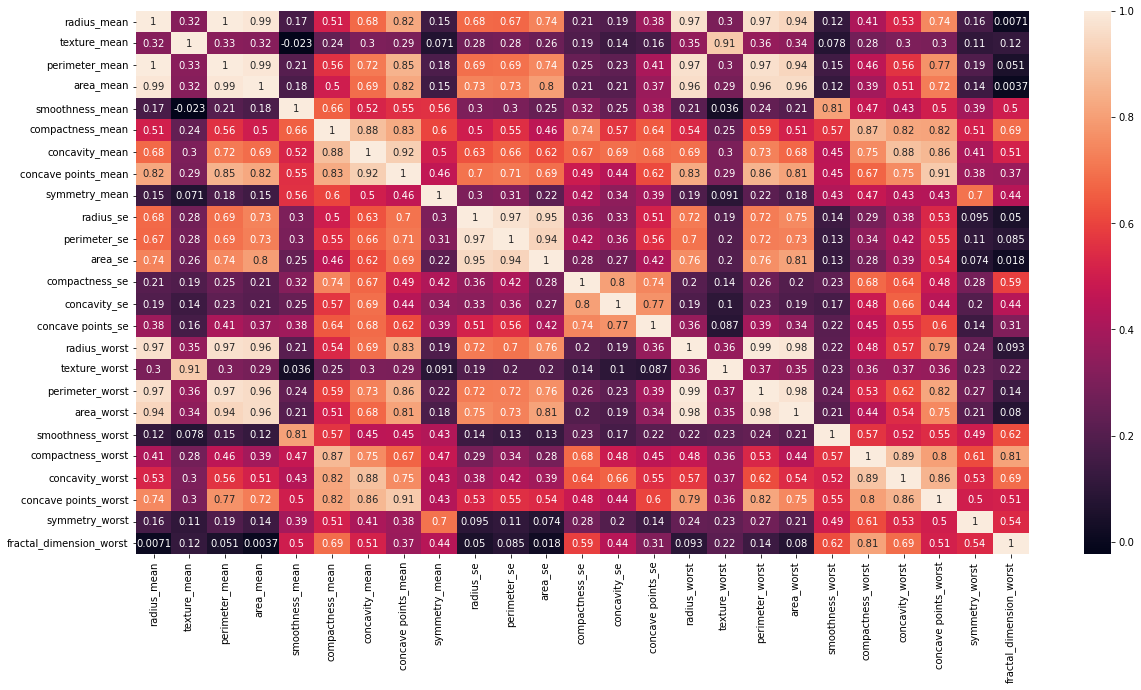

In [415]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

### `Multicollinearity check based on VIF`

In [416]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # to check multicollinearity


### function of vif
def cal_vif(X):
    vif=pd.DataFrame()
    vif['var']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [417]:
X = data.drop('diagnosis',axis=1)

In [418]:
cal_vif(X)

,var,VIF
0,radius_mean,56609.49
2,perimeter_mean,54958.18
15,radius_worst,8880.89
17,perimeter_worst,4327.71
3,area_mean,1119.57
18,area_worst,1017.74
4,smoothness_mean,336.33
9,radius_se,208.37
19,smoothness_worst,205.90
10,perimeter_se,182.03


In [419]:
X.drop(['radius_mean','perimeter_mean','radius_worst','perimeter_worst'],axis=1,inplace=True)

In [420]:
cal_vif(X)

,var,VIF
2,smoothness_mean,270.38
15,smoothness_worst,196.04
0,texture_mean,175.64
13,texture_worst,170.06
6,symmetry_mean,147.59
4,concavity_mean,140.31
5,concave points_mean,137.82
18,concave points_worst,122.88
3,compactness_mean,103.65
7,radius_se,102.58


In [421]:
X.drop(['smoothness_mean','smoothness_worst','texture_mean','texture_worst','symmetry_mean'],axis=1,inplace=True)

In [422]:
cal_vif(X)

,var,VIF
2,concavity_mean,130.98
3,concave points_mean,127.12
13,concave points_worst,109.47
4,radius_se,97.76
1,compactness_mean,82.71
11,compactness_worst,82.13
5,perimeter_se,81.84
12,concavity_worst,77.20
0,area_mean,67.31
10,area_worst,67.26


In [423]:
X.drop(['concavity_mean','concave points_mean','concave points_worst','radius_se','compactness_mean'],axis=1,inplace=True)

In [424]:
cal_vif(X)

,var,VIF
6,area_worst,56.74
0,area_mean,55.71
7,compactness_worst,54.96
8,concavity_worst,40.42
1,perimeter_se,38.27
10,fractal_dimension_worst,37.17
9,symmetry_worst,31.28
2,area_se,25.91
3,compactness_se,23.08
5,concave points_se,18.27


In [425]:
X.drop(['area_worst','area_mean'],axis=1,inplace=True)

In [426]:
cal_vif(X)

,var,VIF
5,compactness_worst,52.46
0,perimeter_se,37.44
8,fractal_dimension_worst,37.00
6,concavity_worst,36.01
7,symmetry_worst,28.78
2,compactness_se,22.52
1,area_se,19.20
3,concavity_se,16.29
4,concave points_se,16.26


### `removing outliers`

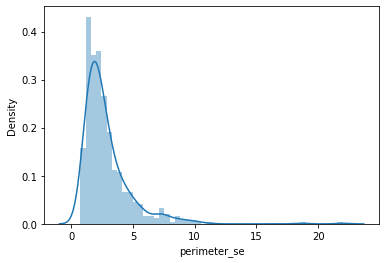

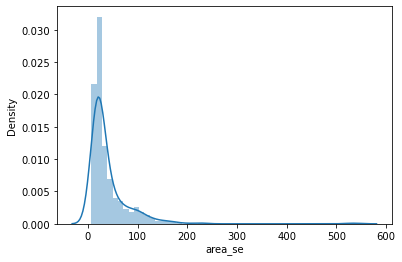

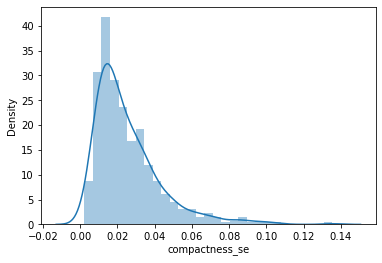

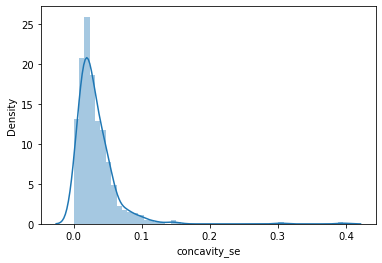

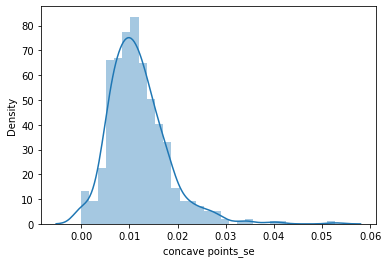

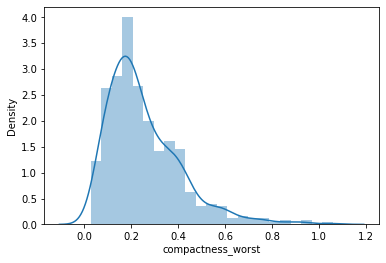

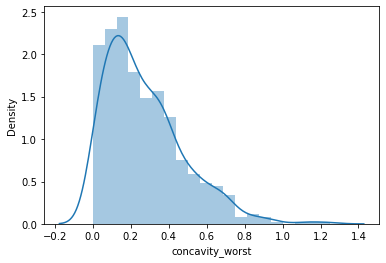

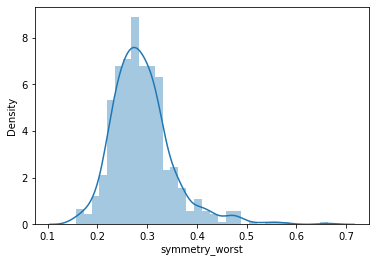

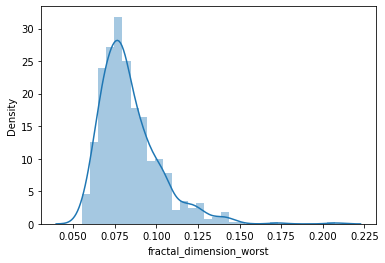

In [427]:
for i in X.columns:
    sns.distplot(data[i])
    plt.show()

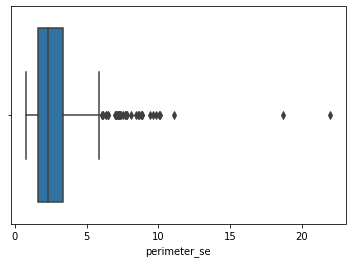

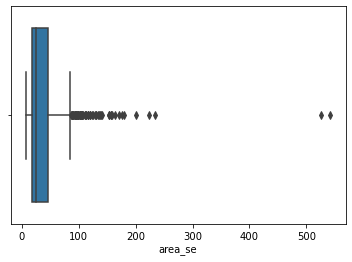

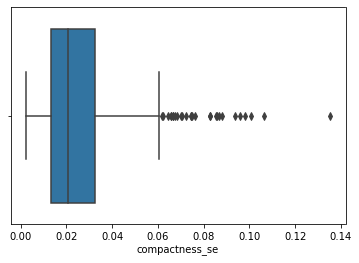

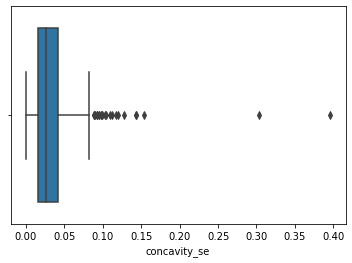

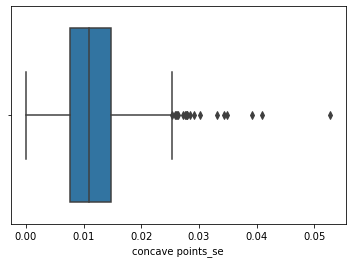

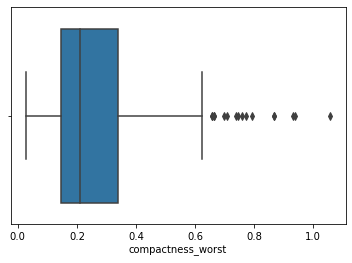

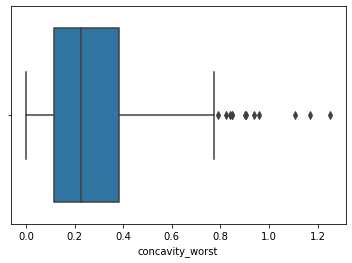

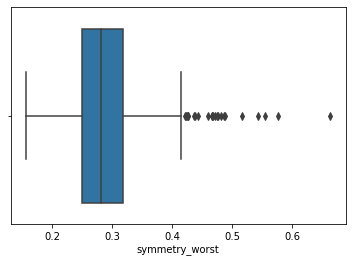

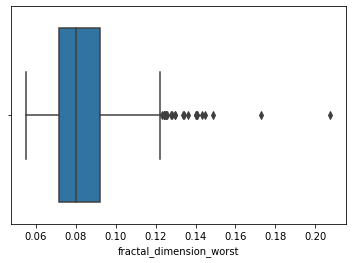

In [428]:
for i in X.columns:
    sns.boxplot(data[i])
    plt.show()

In [429]:
for i in X.columns:
    data[i] = np.log(data[i])

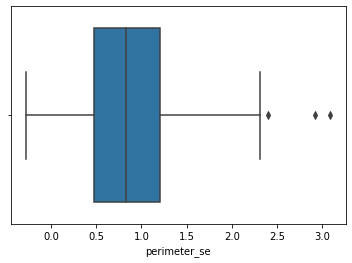

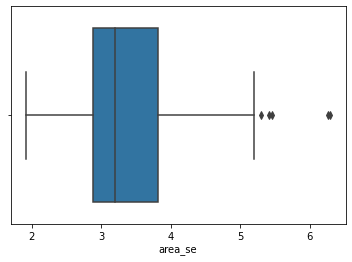

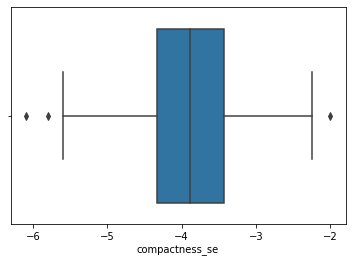

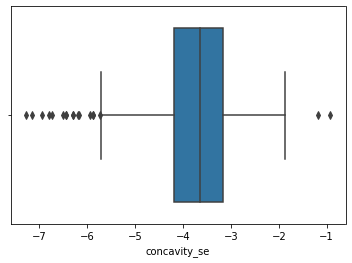

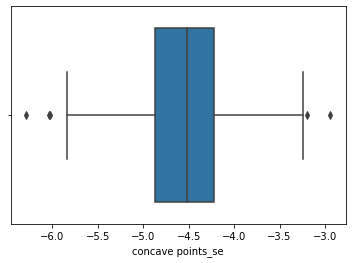

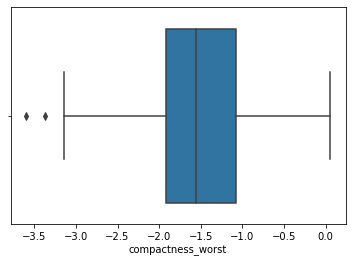

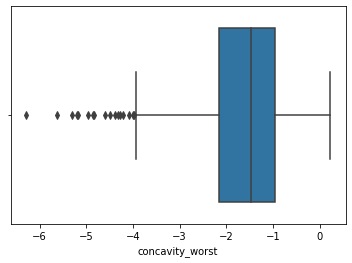

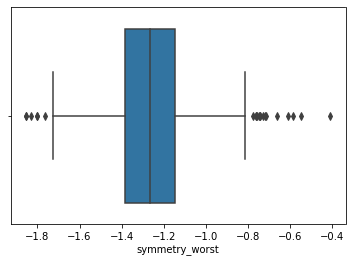

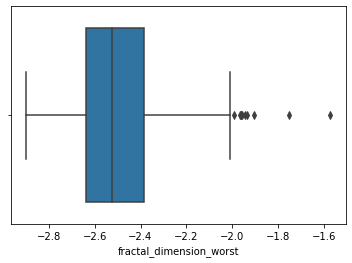

In [430]:
for i in X.columns:
    sns.boxplot(data[i])
    plt.show()

## `Logistic Regression`

In [431]:
from sklearn.model_selection import train_test_split

In [432]:
X_train.values

array([[1.885e+00, 1.767e+01, 8.606e-02, ..., 1.252e+00, 4.228e-01,
        1.175e-01],
       [4.414e+00, 8.146e+01, 4.759e-02, ..., 6.780e-01, 4.098e-01,
        1.284e-01],
       [2.608e+00, 2.352e+01, 3.938e-02, ..., 1.397e-01, 3.282e-01,
        8.490e-02],
       ...,
       [8.439e-01, 1.077e+01, 3.710e-03, ..., 3.866e-02, 2.458e-01,
        6.120e-02],
       [1.602e+00, 1.885e+01, 1.791e-02, ..., 4.069e-01, 3.179e-01,
        1.055e-01],
       [1.183e+00, 1.468e+01, 6.098e-03, ..., 1.145e-01, 2.694e-01,
        6.878e-02]])

In [433]:
y = data.diagnosis
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
y = le.transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [434]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [435]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [436]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.9274725274725275
0.9736842105263158


In [437]:
print(recall_score(y_train,y_pred_train))
print(recall_score(y_test,y_pred_test))

0.863905325443787
0.9302325581395349


In [438]:
print(precision_score(y_train,y_pred_train))
print(precision_score(y_test,y_pred_test))

0.9358974358974359
1.0


In [439]:
print(confusion_matrix(y_train,y_pred_train))
print(confusion_matrix(y_test,y_pred_test))

[[276  10]
 [ 23 146]]
[[71  0]
 [ 3 40]]


In [440]:
print(f1_score(y_train,y_pred_train))
print(f1_score(y_test,y_pred_test))

0.8984615384615384
0.963855421686747


## `ROC AUC`

In [441]:
y_pred_proba = lr.predict_proba(X_test)

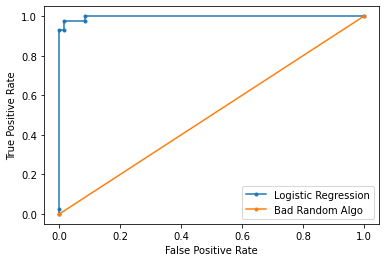

AUC is => 0.99737962659679


In [442]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt


ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds_1 = roc_curve(y_test.astype(int),ns_prob)

lr_prob = y_pred_proba[:,1]
lr_auc = roc_auc_score(y_test.astype(int),lr_prob)   # logistic regression
lr_fpr,lr_tpr,thesholds_2 = roc_curve(y_test.astype(int),lr_prob)

# plotting
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


print(f'AUC is => {lr_auc}')

### `Very good model`